# Flux Conversions

In this code, we will convert all of the  units of our spectrums to fluxes. 

NuSTAR: counts/s to ergs/s/cm^2

Chandra: counts/s to ergs/s/cm^2

GRAVITY: mJy to ergs/s/cm^2

Spitzer: mJy to ergs/s/cm^2

ALMA: Jy to ergs/s/cm^2

In [155]:
from astropy.time import Time
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
plt.style.use('default')
from scipy.signal import find_peaks, peak_prominences
# Imports
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import seaborn as sns
import GPy
from sklearn.metrics import mean_squared_error

np.random.seed(42)
#

In [156]:
data_path = '../../Data/'
work_path = '.'
save_path = '../../../Presentations/AstroAI_Workshop_2024/'

## NuSTAR and Chandra

### Writing Commands for PIMMS

In [157]:
# Load NuSTAR data
file1 = data_path + '0718nust.dat'
df1 = np.genfromtxt(file1)
nustar_time = df1[:, 0]
nustar_cts = df1[:, 1]

# Load Chandra data
file2 = data_path + '0718chan.dat'
df2 = np.genfromtxt(file2, delimiter=' ')
chandra_time = df2[:, 0]
chandra_cts = df2[:, 1]

In [158]:
with open('pimms_commands_nustar.txt', 'w') as f:
    # f.write("MODEL PL 1.7 3e21\n") # See what to put here
    f.write("FROM NUSTAR\n")
    f.write("INSTRUMENT FLUX ERGS 3.0-70.0\n")
    
    for count in nustar_cts:
        f.write(f"GO {count}\n")

print("pimms_commands_nustar.txt file created successfully.")


pimms_commands_nustar.txt file created successfully.


In [159]:
with open('pimms_commands_chandra.txt', 'w') as f:
    # f.write("MODEL PL 1.7 3e21\n") # See what to put here
    f.write("FROM CHANDRA ACIS-I\n")
    f.write("INSTRUMENT FLUX ERGS 2.0-8.0\n")
    
    for count in chandra_cts:
        f.write(f"GO {count}\n")

print("pimms_commands_chandra.txt file created successfully.")


pimms_commands_chandra.txt file created successfully.


### Extracting Fluxes

Before running the following code. Go to this directory in terminal and run the following commands:

pimms < pimms_commands_chandra.txt > pimms_output_chandra.txt

pimms < pimms_commands_nustar.txt > pimms_output_nustar.txt

This will start up the PIMMS environment, feed in the commands written in the commands.txt file. Then it will output everything to the output file. You can then extract the fluxes into a numpy array as follows: 

In [160]:
import re

# Function to extract flux values from PIMMS output
def extract_fluxes(file_path):
    fluxes = []
    with open(file_path, 'r') as file:
        for line in file:
            # Match the line with flux values
            match = re.search(r'PIMMS predicts a flux.*?of\s+([\d\.E\-\+]+)\s+ergs/cm/cm/s', line)
            if match:
                flux_value = float(match.group(1))
                fluxes.append(flux_value)
    return np.array(fluxes)

# Path to your PIMMS output file
output_file_path = 'pimms_output_nustar.txt'

# Extract flux values and store in a numpy array
nustar_flux = extract_fluxes(output_file_path)

print("Flux values in ergs/cm/cm/s:", nustar_flux, '\n\n')

# Path to your PIMMS output file
output_file_path = 'pimms_output_chandra.txt'

# Extract flux values and store in a numpy array
chandra_flux = extract_fluxes(output_file_path)

print("Flux values in ergs/cm/cm/s:", chandra_flux)


Flux values in ergs/cm/cm/s: [9.528e-12 8.977e-12 6.900e-12 1.213e-11 1.101e-11 6.372e-12 8.572e-12
 4.102e-12 6.292e-12 1.039e-11 9.236e-12 1.390e-11 6.363e-12 9.829e-12
 1.150e-11 9.848e-12 8.388e-12 9.782e-12 6.311e-12 7.441e-12 9.245e-12
 6.311e-12 8.614e-12 8.002e-12 1.518e-11 7.903e-12 1.091e-11 8.030e-12
 1.148e-11 1.261e-11 1.902e-11 1.210e-11 1.139e-11 1.359e-11 8.981e-12
 1.030e-11 1.026e-11 5.708e-12 9.735e-12 1.416e-11 8.614e-12 4.827e-12
 8.901e-12 7.432e-12 1.368e-11 1.250e-11 7.399e-12 1.367e-11 1.001e-11
 5.487e-12 6.664e-12 9.156e-12 5.134e-12 1.022e-11 1.363e-11 1.137e-11
 9.669e-12 1.390e-11 6.024e-12 9.711e-12 7.992e-12 1.192e-11 7.940e-12
 1.021e-11 1.022e-11 8.529e-12 1.294e-11 8.694e-12 8.572e-12 1.195e-11
 1.020e-11 6.805e-12 1.134e-11 9.090e-12 7.220e-12 6.886e-12 1.071e-11
 7.973e-12 7.375e-12 9.071e-12 8.515e-12 7.940e-12 8.284e-12 1.419e-11
 9.165e-12 1.128e-11 1.304e-11 1.020e-11 9.066e-12 8.510e-12 1.064e-11
 1.864e-11 7.498e-12 1.150e-11 9.141e-12 1.022e-

### Visualizing Fluxes

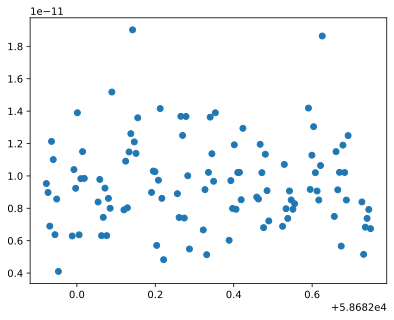

In [161]:
plt.scatter(nustar_time, nustar_flux)

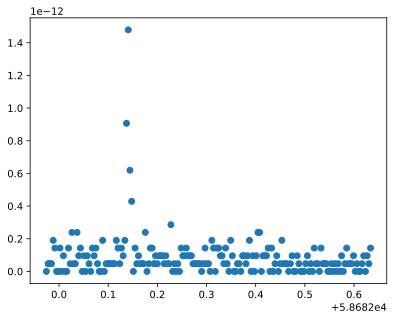

In [162]:
plt.scatter(chandra_time, chandra_flux)

## GRAVITY, Spitzer and ALMA

In [163]:
import astropy.units as u
import astropy.constants as const

def convert_jansky_to_CGS(flux_density_Jy):
    """
    Convert flux density from Janskys to ergs/s/cm²/Hz.

    Parameters:
    flux_density_Jy (float): Flux density in Janskys (Jy)

    Returns:
    float: Flux density in ergs/s/cm²/Hz
    """

    flux_density_Jy = flux_density_Jy * u.Jy
    flux_density_CGS = flux_density_Jy.to(u.erg / (u.s * u.cm**2 * u.Hz))

    return flux_density_CGS.value

def flux_density_to_flux(flux_density_CGS, wavelength_microns=None, frequency_Ghz=None):
    """
    Convert flux density in ergs/s/cm²/Hz to flux in ergs/s/cm²

    Parameters:
    flux_density_CGS (float): Flux density in ergs/s/cm²/Hz
    wavelength_microns (float, optional): Wavelength in microns of resulting band
    frequency_GHz (float, optional): Frequency in GHz of resulting band

    Returns:
    float: Flux in ergs/s/cm²
    """

    if wavelength_microns is not None:
        # Convert wavelength to frequency
        wavelength = wavelength_microns * u.um
        frequency = (const.c / wavelength).to(u.Hz)
    elif frequency_Ghz is not None:
        frequency = (frequency_Ghz * u.GHz).to(u.Hz)
    else:
        raise ValueError("Either wavelength or frequency must be provided")
    
    flux_density_CGS = flux_density_CGS * (u.erg / (u.s * u.cm**2 * u.Hz))

    flux_CGS = flux_density_CGS * frequency

    return flux_CGS.value

In [164]:
# Plot 3 - VLT
file3 = data_path + '0718grav.dat'
df3 = np.genfromtxt(file3)
gravity_time = df3[:, 0]
gravity_Jy = df3[:, 1] * 1e-3 # convert to Jy. In original dataframe it is in mJy

# Plot 4 - Spitzer
file4 = data_path + '0718sptz.dat'
df4 = np.genfromtxt(file4)
spitzer_time = df4[:, 0]
spitzer_Jy = df4[:, 2] # convert to Jy. In original dataframe it is in Jy

# Plot 5 - ALMA
file5 = data_path + '0718alma.dat'
df5 = np.genfromtxt(file5, delimiter=' ')
alma_time = df5[:, 2]
alma_Jy = df5[:, 3] # convert to Jy. In original dataframe it is in Jy

In [165]:
# Convert GRAVITY
gravity_flux = flux_density_to_flux(convert_jansky_to_CGS(gravity_Jy), wavelength_microns=2.2)

# Convert Spitzer
spitzer_flux = flux_density_to_flux(convert_jansky_to_CGS(spitzer_Jy), wavelength_microns=4.5)

# Convert ALMA
alma_flux = flux_density_to_flux(convert_jansky_to_CGS(alma_Jy), frequency_Ghz=340)

### Visualizing Fluxes

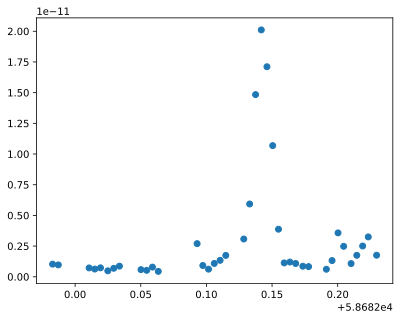

In [166]:
plt.scatter(gravity_time, gravity_flux)

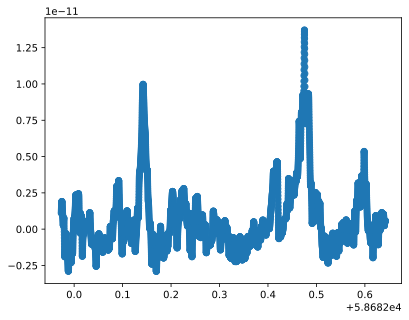

In [167]:
plt.scatter(spitzer_time, spitzer_flux)

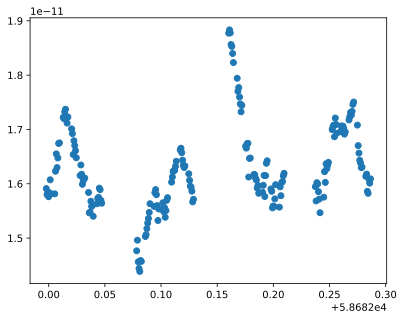

In [168]:
plt.scatter(alma_time, alma_flux)

# Save Fluxes

In [169]:
np.save('../../Data/nustar_flux.npy', nustar_flux)

np.save('../../Data/chandra_flux.npy', chandra_flux)

np.save('../../Data/gravity_flux.npy', gravity_flux)

np.save('../../Data/spitzer_flux.npy', spitzer_flux)

np.save('../../Data/alma_flux.npy', alma_flux)